In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING DATA SET

In [82]:
df=pd.read_csv("Different_stores_dataset (1).csv")

In [83]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


### 1. Check missing values and duplicate records

### MISSING VALUES

In [84]:
df.isnull().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

### DUPLICATED VALUES

In [85]:
print(f"Total Duplicated Values: {df.duplicated().sum()}")

Total Duplicated Values: 0


### 2. Add column name 'Total Sales'

In [86]:
df["Total Sales"]=df["selling_price_per_unit"]*df["quantity"]
df["Total Sales"]=df["Total Sales"].round(2)
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40


### 3. How many customers have age more than 60?

In [87]:
print("Total No of Customers having age more than 60:",df[df["age"]>60].shape[0])

Total No of Customers having age more than 60: 17169


### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

### NO OF UNIQUE CUSTOMER IDS

In [88]:
print("No of Unique Customer IDs Entries:",df["customer_id"].nunique())

No of Unique Customer IDs Entries: 99457


### CUSTOMERS WITH MULTIPLE PURCHASES

In [89]:
mult_purchases=df["customer_id"]!=df["customer_id"].unique()
print("No of Customers makes Multiple Purchases:",mult_purchases.sum())

No of Customers makes Multiple Purchases: 0


### 5. Are there more male or female customers, Show in Pie Chart?

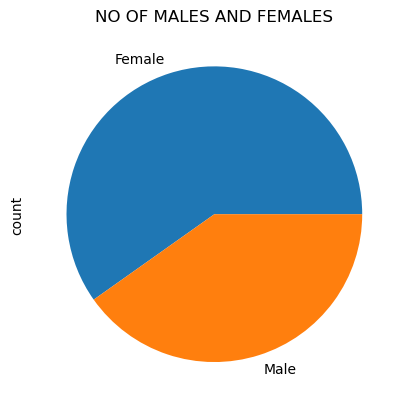

In [90]:
df["gender"].value_counts().plot(kind="pie")
plt.title("NO OF MALES AND FEMALES")
plt.show()

### 6. Which category is least popular among customers?

In [91]:
print("Cataogory Least Popular among Customer",df["category"].value_counts().tail(1))

Cataogory Least Popular among Customer category
Books    4981
Name: count, dtype: int64


### 7. Which category has the highest sales volume?

In [92]:
print("Cataogory with Highest Sales Volume",df["category"].value_counts().head(1))

Cataogory with Highest Sales Volume category
Clothing    34487
Name: count, dtype: int64


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [93]:
df["Total Profit"]=df["Total Sales"]-df["cost_price_per_unit"]
df["Total Profit"]=df["Total Profit"].round(2)
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00,6076.62
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53,3781.07
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,300.08,5.02
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,15004.25,12103.48
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,242.40,196.95


### 9. Display the top 10 invoices with the highest quantities sold?

In [94]:
df[["invoice_no","quantity"]].sort_values(by="quantity",ascending=False).head(10)

,invoice_no,quantity
100,I283443,15
275,I282789,12
109,I293215,12
305,I115679,11
129,I160221,10
61,I207205,10
224,I353272,10
201,I286193,9
145,I246375,8
11,I139207,8


### 10. Which payment method is most commonly used?

In [95]:
print("Most Commonly Used Payment Method",df["payment_method"].value_counts().nlargest(1))

Most Commonly Used Payment Method payment_method
Cash    44447
Name: count, dtype: int64


### 11. Total Sales with respect to region?

In [96]:
Sales_South=df[df["region"]=="South"]["Total Sales"].sum().round(2)
Sales_West=df[df["region"]=="West"]["Total Sales"].sum().round(2)
Sales_Central=df[df["region"]=="Central"]["Total Sales"].sum().round(2)
Sales_East=df[df["region"]=="East"]["Total Sales"].sum().round(2)

print("Sales South Region:",Sales_South)
print("Sales West Region:",Sales_West)
print("Sales Central Region:",Sales_Central)
print("Sales East Region:",Sales_East)


Sales South Region: 40655491.64
Sales West Region: 79825624.03
Sales Central Region: 58803471.74
Sales East Region: 72280660.57


### 12. Sort Malls with average sales higher to lower?

In [97]:
data_malls=df.groupby('shopping_mall')["Total Sales"].mean()
sort_malls=data_malls.sort_values(ascending=False)
sort_malls

shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64

### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

<Axes: xlabel='category'>

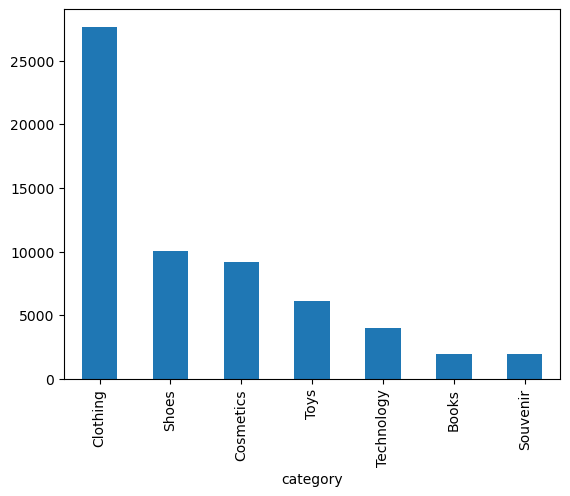

In [98]:
prof_margin=(df["Total Sales"].sum()/df["Total Profit"].sum())*100
df[df["Total Profit"]>=prof_margin]["category"].value_counts().plot(kind="bar")


### 14.  What is the total number of transactions per region for each payment method?

In [99]:
df["payment_method"].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

### 15. How do sales in different categories compare between males and females?

In [100]:
df[["gender","category"]].groupby('gender').value_counts()


gender  category       
Female  Clothing           20652
        Cosmetics           9070
        Food & Beverage     8804
        Toys                6085
        Shoes               5967
        Souvenir            3017
        Technology          2981
        Books               2906
Male    Clothing           13835
        Cosmetics           6027
        Food & Beverage     5972
        Shoes               4067
        Toys                4002
        Books               2075
        Technology          2015
        Souvenir            1982
Name: count, dtype: int64